# AZUR WITH PYTHON

https://learn.microsoft.com/en-us/azure/storage/blobs/storage-quickstart-blobs-python?tabs=managed-identity%2Croles-azure-portal%2Csign-in-azure-cli&pivots=blob-storage-quickstart-scratch

Azure Blob Storage is optimized for storing massive amounts of unstructured data. Unstructured data is data that doesn't adhere to a particular data model or definition, such as text or binary data. Blob storage offers three types of resources:

- The storage account

  - A container in the storage account

    - A blob in the container

**Step-1**

**install the packages**

In [1]:
!pip install azure-storage-blob azure-identity

Use the following Python classes to interact with these resources:

**BlobServiceClient:** The BlobServiceClient class allows you to manipulate Azure Storage resources and blob containers.

**ContainerClient:** The ContainerClient class allows you to manipulate Azure Storage containers and their blobs.

**BlobClient:** The BlobClient class allows you to manipulate Azure Storage blobs.

## Create Container

Create a new container in your storage account by calling the create_container method on the blob_service_client object

- we need to access azure account

- we need to access the corresponding sotrage details

- BlobServiceClient Expecting two arguments

  - account_url

  - credential

In [2]:
from azure.storage.blob import BlobServiceClient

In [3]:
blob_account_url='https://cloudshell1644746318.blob.core.windows.net' 
# user must enter valid container name before .BLOB
storage_credential='2Bdj/6aeg0VmdfnWMG47hjy0IENpt9Cf1n77vvA/w7ttu4YCciDWhlR8AB6y+3HR/xdZ8X+9ZkuZ+ASthn/Zug=='

blob_service_client=BlobServiceClient(account_url=blob_account_url,credential=storage_credential)

blob_service_client

**Method-1**

- we will create the container using blob service client

In [4]:
# Create the container
new_container=blob_service_client.create_container("vscodecontainer",public_access="container")
new_container

In [5]:
new_container.get_container_properties()

{'name': 'vscodecontainer', 'last_modified': datetime.datetime(2024, 11, 28, 7, 8, 29, tzinfo=datetime.timezone.utc), 'etag': '"0x8DD0F7B7608FD2D"', 'lease': {'status': 'unlocked', 'state': 'available', 'duration': None}, 'public_access': 'container', 'has_immutability_policy': False, 'deleted': None, 'version': None, 'has_legal_hold': False, 'metadata': {}, 'encryption_scope': <azure.storage.blob._models.ContainerEncryptionScope object at 0x000001D42703E230>, 'immutable_storage_with_versioning_enabled': False}

## List out All containers

In [6]:
all_containers=blob_service_client.list_containers()
all_containers

<iterator object azure.core.paging.ItemPaged at 0x1d42703d3c0>

In [7]:
# the variable is a iterator, you need to get outputs by using for loop
for container in all_containers:
    print(container)

{'name': 'cloudcountainer', 'last_modified': datetime.datetime(2024, 11, 28, 6, 52, 52, tzinfo=datetime.timezone.utc), 'etag': '"0x8DD0F79476D51D2"', 'lease': {'status': 'unlocked', 'state': 'available', 'duration': None}, 'public_access': None, 'has_immutability_policy': False, 'deleted': None, 'version': None, 'has_legal_hold': False, 'metadata': None, 'encryption_scope': <azure.storage.blob._models.ContainerEncryptionScope object at 0x000001D426F8E050>, 'immutable_storage_with_versioning_enabled': False}
{'name': 'vscodecontainer', 'last_modified': datetime.datetime(2024, 11, 28, 7, 8, 29, tzinfo=datetime.timezone.utc), 'etag': '"0x8DD0F7B7608FD2D"', 'lease': {'status': 'unlocked', 'state': 'available', 'duration': None}, 'public_access': 'container', 'has_immutability_policy': False, 'deleted': None, 'version': None, 'has_legal_hold': False, 'metadata': None, 'encryption_scope': <azure.storage.blob._models.ContainerEncryptionScope object at 0x000001D4270438B0>, 'immutable_storage_w

In [8]:
all_containers=blob_service_client.list_containers()
list(all_containers)

[{'name': 'cloudcountainer', 'last_modified': datetime.datetime(2024, 11, 28, 6, 52, 52, tzinfo=datetime.timezone.utc), 'etag': '"0x8DD0F79476D51D2"', 'lease': {'status': 'unlocked', 'state': 'available', 'duration': None}, 'public_access': None, 'has_immutability_policy': False, 'deleted': None, 'version': None, 'has_legal_hold': False, 'metadata': None, 'encryption_scope': <azure.storage.blob._models.ContainerEncryptionScope object at 0x000001D42705BE20>, 'immutable_storage_with_versioning_enabled': False},
 {'name': 'vscodecontainer', 'last_modified': datetime.datetime(2024, 11, 28, 7, 8, 29, tzinfo=datetime.timezone.utc), 'etag': '"0x8DD0F7B7608FD2D"', 'lease': {'status': 'unlocked', 'state': 'available', 'duration': None}, 'public_access': 'container', 'has_immutability_policy': False, 'deleted': None, 'version': None, 'has_legal_hold': False, 'metadata': None, 'encryption_scope': <azure.storage.blob._models.ContainerEncryptionScope object at 0x000001D42705AB60>, 'immutable_storag

## Delete the Container

In [9]:
all_containers=blob_service_client.list_containers()
for container in all_containers:
    print("deleting:",'vscodecontainer')
    blob_service_client.delete_container('vscodecontainer')

deleting: vscodecontainer
deleting: vscodecontainer


- In above we cretaed a Container

- we list out all containers

- we deleted containers

## Upload a blob

- we deleted all containers

- So create one container

- upload a blob in that container

- access the blob from container

**Create the container**

In [10]:
blob_account_url='https://cloudshell1644746318.blob.core.windows.net' 
storage_credential='2Bdj/6aeg0VmdfnWMG47hjy0IENpt9Cf1n77vvA/w7ttu4YCciDWhlR8AB6y+3HR/xdZ8X+9ZkuZ+ASthn/Zug=='

blob_service_client=BlobServiceClient(account_url=blob_account_url,
                                      credential=storage_credential)
new_container=blob_service_client.create_container('createcontainer',public_access='Container')
new_container

$text-file$

In [11]:
# Create a BlobClient instance for the specified blob
blob_name='sample.txt'
file_path=r"C:\Users\soham\OneDrive\Desktop\(NOV-28)\sample.txt"
container_client = blob_service_client.get_container_client('createcontainer')
blob_client = container_client.get_blob_client(blob_name)

# Upload the file to the blob
with open(file_path, "rb") as data:
    blob_client.upload_blob(data, overwrite=True)

$csv-file$

In [12]:
blob_name='cleandata.csv'
file_path=r"C:\Users\soham\OneDrive\Desktop\(NOV-28)\clean_data.csv"
container_client = blob_service_client.get_container_client('createcontainer')
blob_client = container_client.get_blob_client(blob_name)

# Upload the file to the blob
with open(file_path, "rb") as data:
    blob_client.upload_blob(data, overwrite=True)

$image$

In [13]:
blob_name='horse.jpg'
file_path=r"C:\Users\soham\OneDrive\Desktop\(NOV-28)\horse.jpg"
container_client = blob_service_client.get_container_client('createcontainer')
blob_client = container_client.get_blob_client(blob_name)

# Upload the file to the blob
with open(file_path, "rb") as data:
    blob_client.upload_blob(data, overwrite=True)

## Access the blobs

**Get all the blobs**

In [14]:
container_client = blob_service_client.get_container_client('createcontainer')
for blob in container_client.list_blobs():
    print(blob)

{'name': 'clean_data.csv', 'container': 'createcontainer', 'snapshot': None, 'version_id': None, 'is_current_version': None, 'blob_type': <BlobType.BLOCKBLOB: 'BlockBlob'>, 'metadata': {}, 'encrypted_metadata': None, 'last_modified': datetime.datetime(2024, 11, 28, 7, 23, 51, tzinfo=datetime.timezone.utc), 'etag': '0x8DD0F7D9BCD84DC', 'size': 262, 'content_range': None, 'append_blob_committed_block_count': None, 'is_append_blob_sealed': None, 'page_blob_sequence_number': None, 'server_encrypted': True, 'copy': {'id': None, 'source': None, 'status': None, 'progress': None, 'completion_time': None, 'status_description': None, 'incremental_copy': None, 'destination_snapshot': None}, 'content_settings': {'content_type': 'text/csv', 'content_encoding': None, 'content_language': None, 'content_md5': bytearray(b'i\xdb\x7f\x14\xb0\x95\x93)\xb9N(t\xe6\xe8\x9a\xe5'), 'content_disposition': None, 'cache_control': None}, 'lease': {'status': 'unlocked', 'state': 'available', 'duration': None}, 'blo

**Access CSV data**

In [15]:
blob_client=blob_service_client.get_blob_client('createcontainer','cleandata.csv')
data=blob_client.download_blob()
import pandas as pd
pd.read_csv(data)

,Unnamed: 0,Name,Domain,Age,Location,Salary,Exp
0,0,Mike,Datascience,34,Mumbai,5000,2
1,1,Teddy,Testing,45,Bangalore,10000,3
2,2,Umar,Dataanalyst,50,Bangalore,15000,4
3,3,Jane,Analytics,50,Hyderbad,20000,4
4,4,Uttam,Statistics,67,Bangalore,30000,5
5,5,Kim,NLP,55,Delhi,60000,10


**Access Image data**

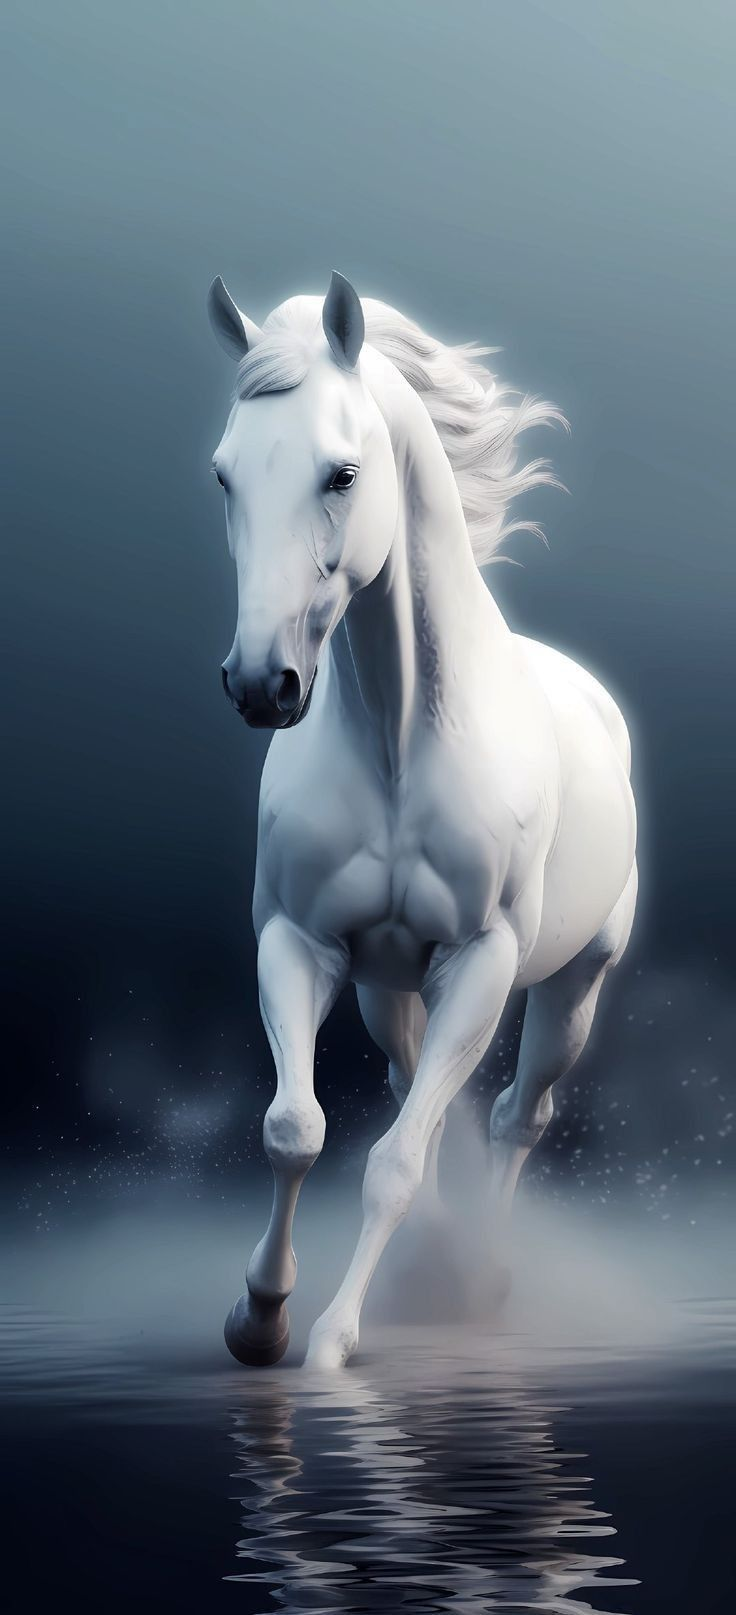

In [16]:
blob_client=blob_service_client.get_blob_client('createcontainer','horse.jpg')
data=blob_client.download_blob()
from PIL import Image
Image.open(data)

To acess text

In [17]:
# To access text

blob_client=blob_service_client.get_blob_client('createcontainer','sample.txt')
data=blob_client.download_blob()
import pandas as pd
pd.read_csv(data)

,**Artificial Intelligence (AI)** refers to the simulation of human intelligence in machines that are programmed to think,learn,and solve problems. AI is an interdisciplinary field that draws from computer science,mathematics,cognitive science,and other areas. It can be classified into two broad categories:
0,### 1. **Narrow AI (Weak AI)**,NaN,NaN,NaN,NaN,NaN
1,This type of AI is designed to perform a speci...,such as:,NaN,NaN,NaN,NaN
2,- **Voice Assistants** like Siri or Alexa,NaN,NaN,NaN,NaN,NaN
3,- **Recommendation Systems** (e.g.,Netflix or Amazon recommendations),NaN,NaN,NaN,NaN
4,- **Image Recognition** (e.g.,facial recognition),NaN,NaN,NaN,NaN
5,- **Autonomous Vehicles** (self-driving cars),NaN,NaN,NaN,NaN,NaN
6,### 2. **General AI (Strong AI)**,NaN,NaN,NaN,NaN,NaN
7,This hypothetical form of AI would have the ab...,learn,and apply intelligence across a wide range of...,much like a human. General AI would not be re...,it is the subject of ongoing research.,NaN
8,---,NaN,NaN,NaN,NaN,NaN
9,### Key Concepts in AI,NaN,NaN,NaN,NaN,NaN
